In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import numpy as np
import feature_manager as fma
import rl.env_simple_crypto_trade as env
import rl.models as rla
import importlib
import matplotlib.pyplot as plt
import rl.models as rla
import config as cf

In [ ]:
fm = fma.FeatureManager(target_col="trade_signal")
fm.import_trading_data(symbol="BTCUSDT",trade_timeframe="4h")
fm.import_macro_data(symbol="BTCUSDT",macro_timeframe="1d")
fm.import_super_data(symbol="BTCUSDT",super_timeframe="1w")

fm.build_features(
    lags = 1,
    macro_lags = 1,
    super_lags = 1,
    features = cf.BITCOIN_EXTERNAL_INDICATORS + cf.TRADING_TA_INDICATORS,
    macro_features = cf.MACRO_TA_INDICATORS,
    super_features = cf.SUPER_TA_INDICATORS
)

In [ ]:
train = fm.df.iloc[-4000:-2000]
trade = fm.df.iloc[-2000:]

importlib.reload(env)

env_kwargs = cf.TRADE_ENV_PARAMETER
state_space = 3 + len(fm.cols)

train_env = env.CryptoTradingEnv(
    df = train, 
    state_space=state_space,
    indicators=fm.cols,
    **env_kwargs)

trade_env = env.CryptoTradingEnv(
    df = trade, 
    state_space=state_space,
    indicators=fm.cols,
    **env_kwargs)

In [ ]:
importlib.reload(rla)
agent = rla.DRLTradeAgent(env=train_env)

In [ ]:
model_ppo = agent.get_model(model_name="ppo",seed=100)
model_a2c = agent.get_model(model_name="a2c",seed=100)
model_ars = agent.get_model(model_name="ars",seed=100)
model_trpo = agent.get_model(model_name="trpo",seed=100)

In [24]:
model = agent.load_model("ppo","ppo")

Successfully load model from ../saved_models/checkpoint/no_candle/rl_model_75000_steps


hit end!
Trade count and duration statistics:
               0           1           2
count  68.000000  179.000000  185.000000
mean    1.147059    9.614525    1.086486
std     0.356798    9.998989    0.318080
min     1.000000    1.000000    1.000000
25%     1.000000    3.000000    1.000000
50%     1.000000    6.000000    1.000000
75%     1.000000   13.000000    1.000000
max     2.000000   68.000000    3.000000


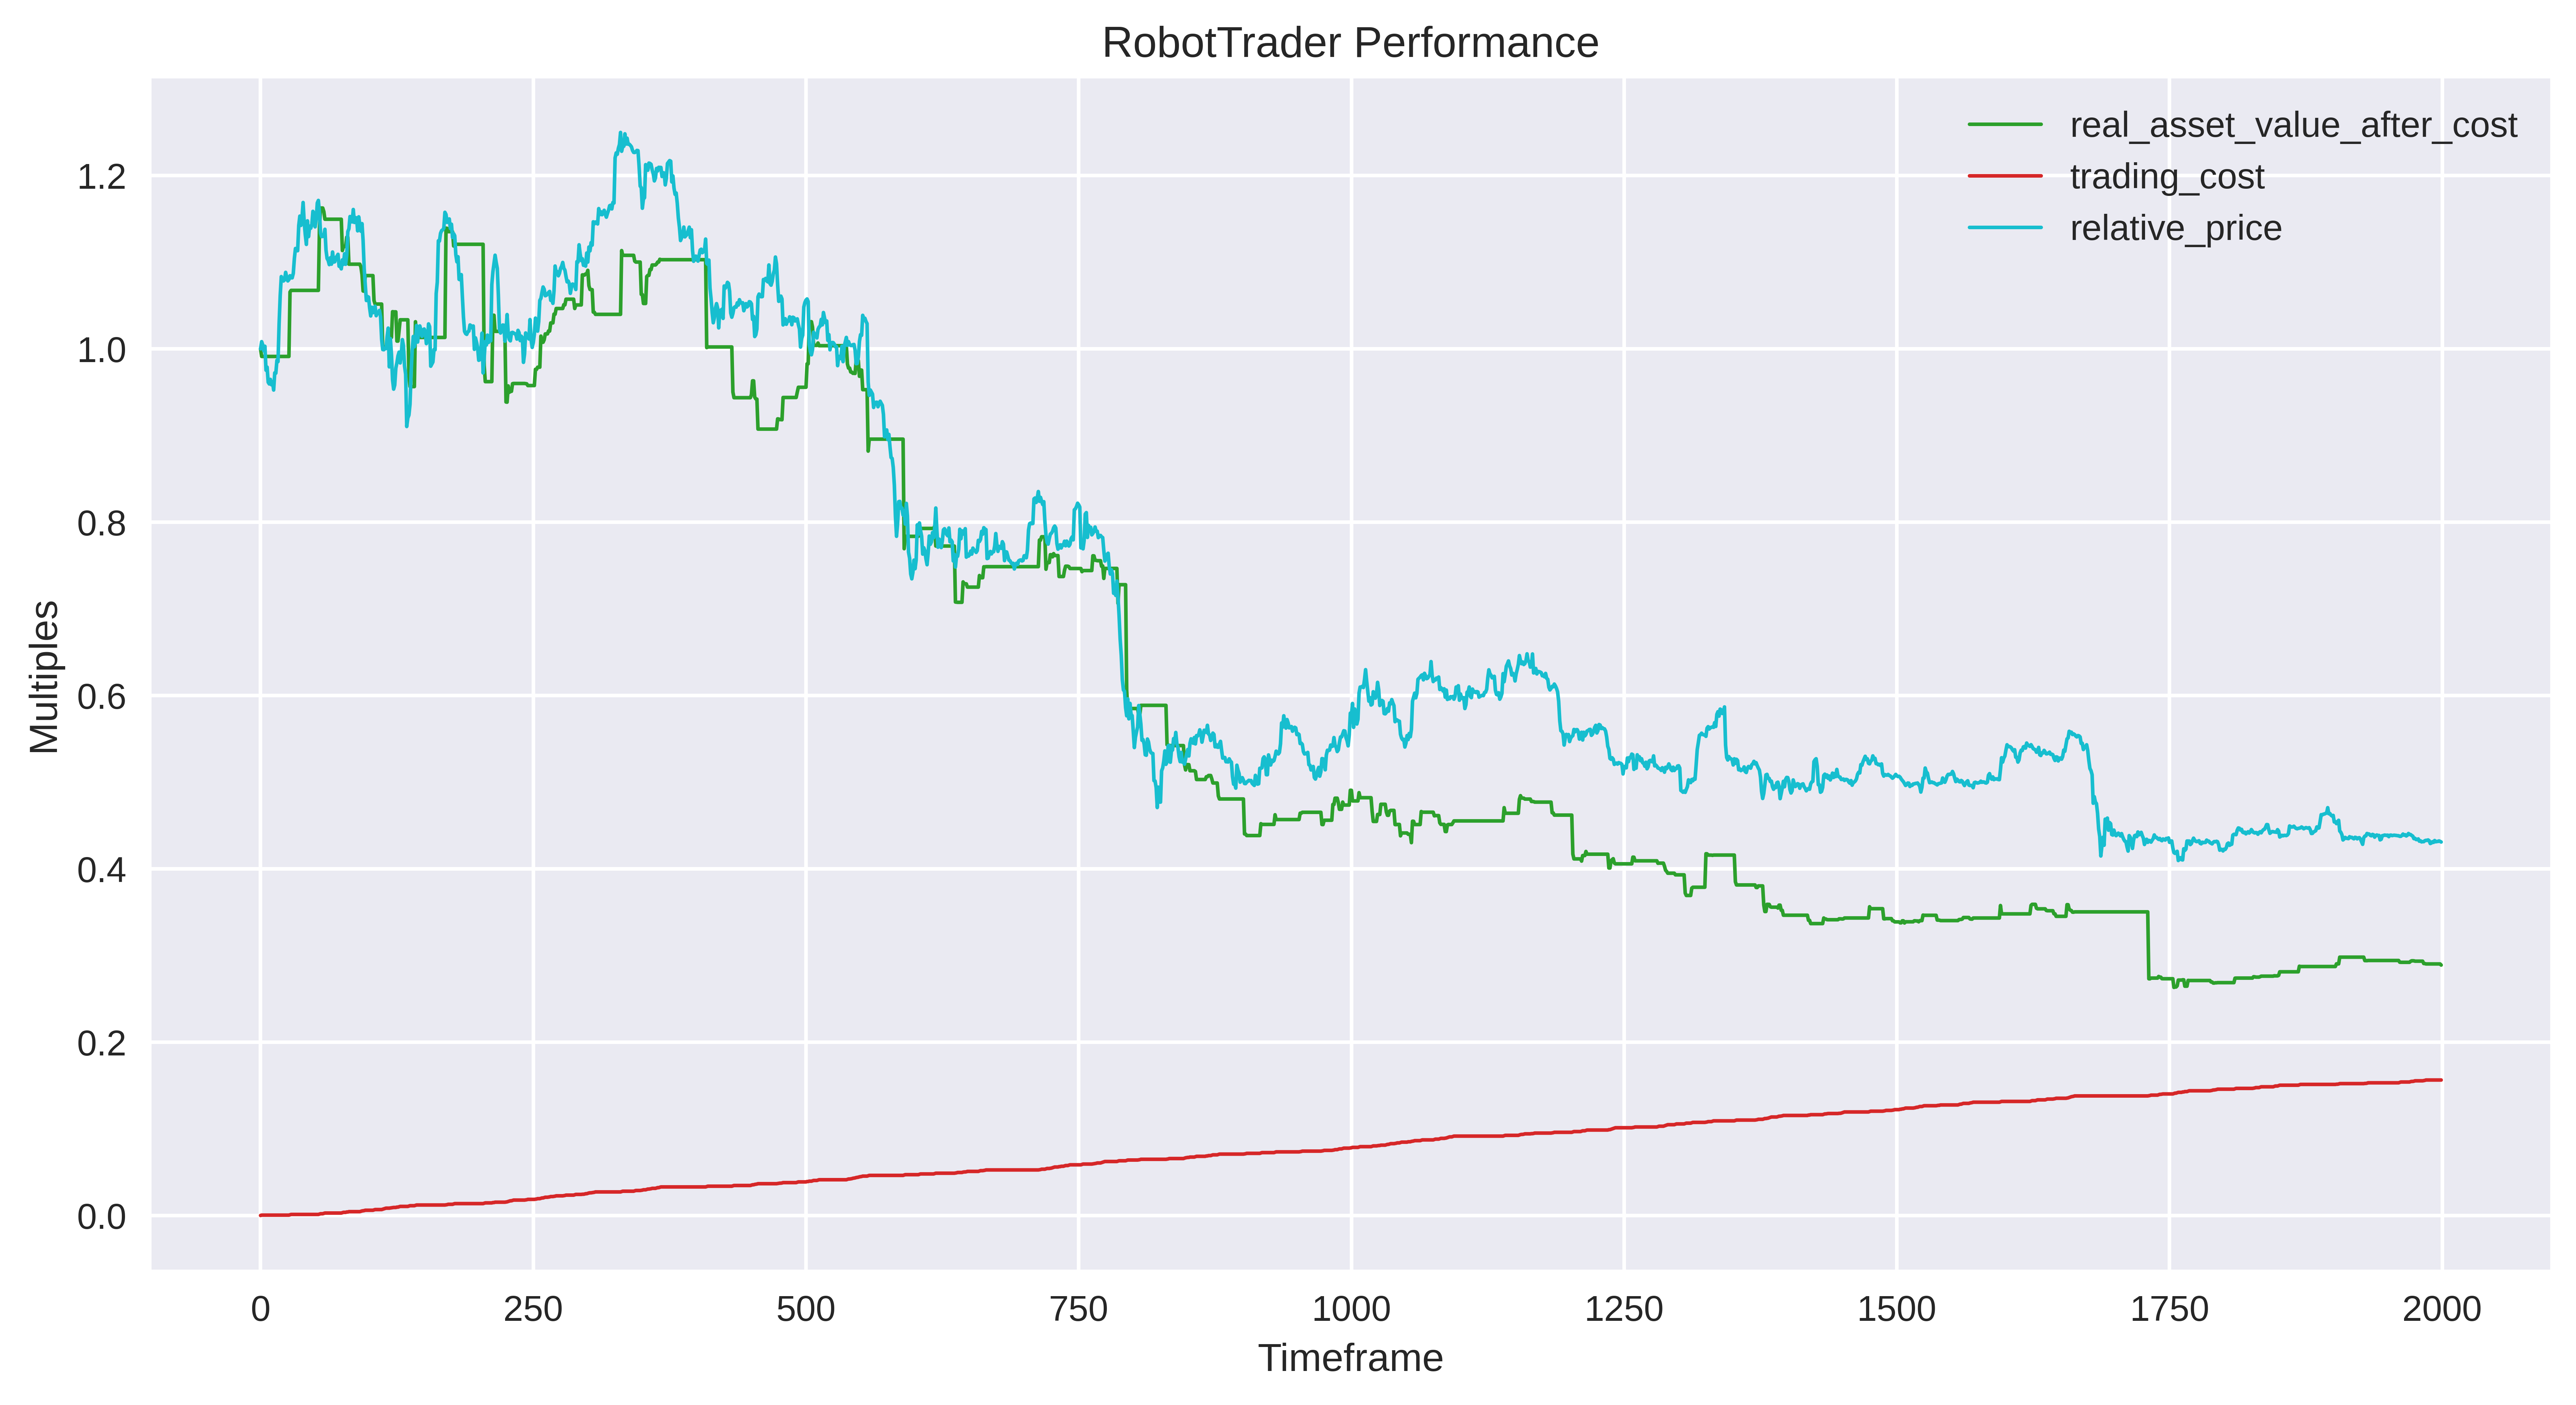

In [25]:
agent.predict(model,trade_env,render=False)